In [4]:
# go to the root directory
# %cd /home/studio-lab-user/701-simplicity-bias
# %cd D:/repos/701-simplicity-bias/
%cd /root/701-simplicity-bias
import os

assert os.path.exists('./trainers/trainer.py')

/root/701-simplicity-bias


In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
from synthetic_data.linear_slabs import LinearSlabDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## $LMS-5, MS-(5,7), \hat{LMS}-7$

In [15]:
data_config = dict(
    num_samples=110000,
    num_dim=50,
    margins=0.1,
    width=1.0,
    random_orthonormal_transform=True
)

lms_5_data_config = {**data_config, **{'slabs': np.array([2] + [5] * 49), 'noise_proportions': 0,
                                       'slab_probabilities': [[1.0, 1.0]] +  [[0.125, 0.5, 0.75, 0.5, 0.125]] * 49}}
ms_57_data_config = {**data_config, **{'slabs': np.array([5] + [7] * 49), 'noise_proportions': 0,
                                       'slab_probabilities': [[0.125, 0.5, 0.75, 0.5, 0.125]] +
                                                         [[1/16.0, 0.25, 7 / 16.0, 0.5, 7 / 16.0, 0.25, 1 / 16.0]] * 49}}
lms_7_noisy_data_config = {**data_config, **{'slabs': np.array([2] + [7] * 49),
                                             'noise_proportions': np.array([0.1] + [0] * 49),
                                             'slab_probabilities': [[1.0, 1.0]] +
                                                                   [[1/16.0, 0.25, 7 / 16.0, 0.5, 7 / 16.0, 0.25, 1 / 16.0]] * 49}}
lms_7_40000_noisy_data_config = {**lms_7_noisy_data_config, **{'num_samples': 40000 + 10000}}
lms_7_40000_uniform_noisy_data_config = {
    **lms_7_noisy_data_config,
    'slab_probabilities':  [[1.0, 1.0]] +
                           [[1.0 / 4, 1.0 / 3, 1.0 / 4, 1.0 / 3, 1.0 / 4, 1.0 / 3, 1.0 / 4]] * 49
}


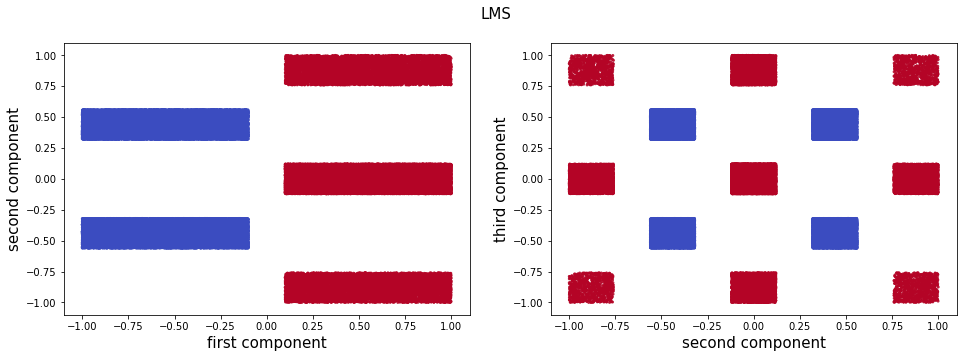

In [9]:
lms_5_data = LinearSlabDataset.generate(**lms_5_data_config)
lms_5_data.visualize()

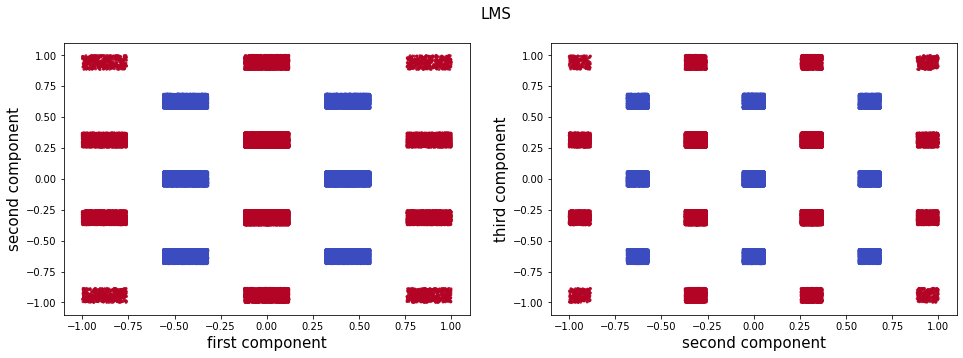

In [10]:
ms_57_data = LinearSlabDataset.generate(**ms_57_data_config)
ms_57_data.visualize()

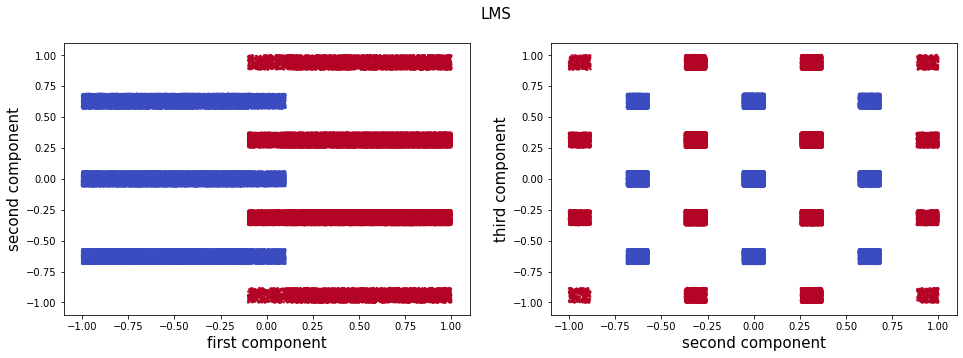

In [11]:
lms_7_noisy_data = LinearSlabDataset.generate(**lms_7_noisy_data_config)
lms_7_noisy_data.visualize()

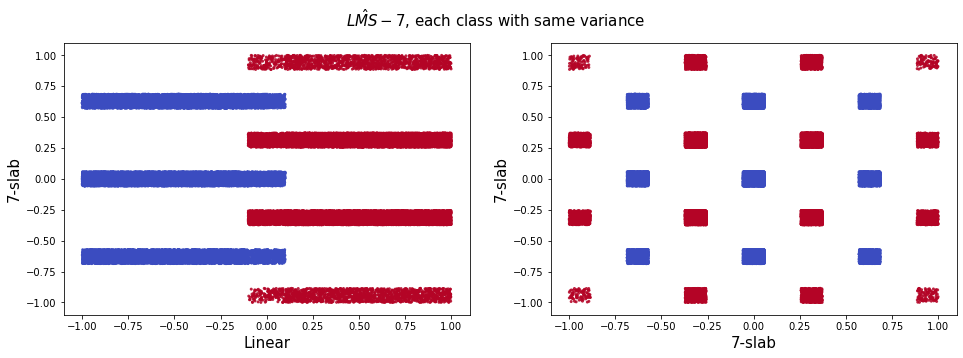

In [23]:
lms_7_40000_noisy_data = LinearSlabDataset.generate(**lms_7_40000_noisy_data_config)
lms_7_40000_noisy_data.visualize(title=r'$\hat{LMS}-7$, each class with same variance', save_as='./output/noisy_lms7_variance.png',
                                         axis_names=('Linear', '7-slab', '7-slab'))

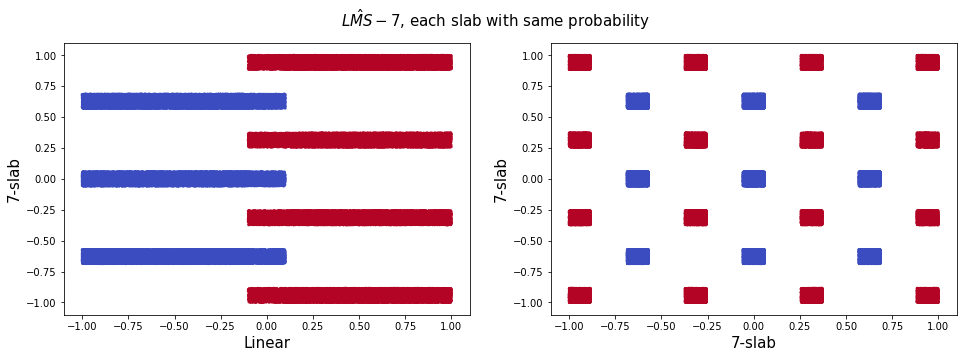

In [24]:
lms_7_40000_uniform_noisy_data = LinearSlabDataset.generate(**lms_7_40000_uniform_noisy_data_config)
lms_7_40000_uniform_noisy_data.visualize(title=r'$\hat{LMS}-7$, each slab with same probability', save_as='./output/noisy_lms7_uniform.png',
                                         axis_names=('Linear', '7-slab', '7-slab'))

In [25]:
#@title train/val split and save linear data
os.makedirs('./data', exist_ok=True)
data_dir = os.path.abspath('./data')
print('Saving Data to {}'.format(data_dir))
train_size = 100000
for name, data, train_size in [
    ('lms_5', lms_5_data, 100000),
    ('ms_57', ms_57_data, 100000),
    ('lms_7_noisy', lms_7_noisy_data, 100000),
    ('lms_7_40000_noisy', lms_7_40000_noisy_data, 40000),
    ('lms_7_40000_uniform_noisy', lms_7_40000_uniform_noisy_data, 40000)
]:
    path = os.path.join(data_dir, name)
    data.save_as(path, train_size)

Saving Data to /root/701-simplicity-bias/data


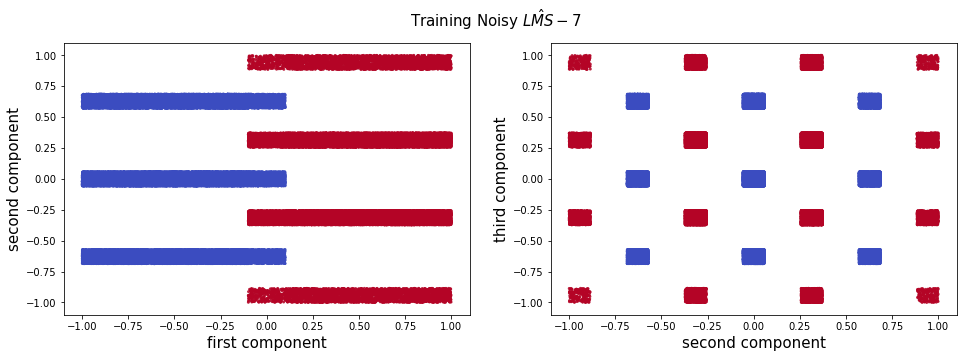

In [14]:
#@title test loading data
loaded_lms7_train= LinearSlabDataset.from_file(os.path.join(data_dir, 'lms_7_noisy_train.npz'))
loaded_lms7_train.visualize( title=r'Training Noisy $\hat{LMS}-7$')